In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras import metrics

%matplotlib inline

In [2]:
# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
(train_images1, train_labels1), (test_images1, test_labels1) = tf.keras.datasets.mnist.load_data()

# Preprocess the data
train_images = train_images / 255.0  # Normalize to [0,1]
test_images = test_images / 255.0


In [3]:
# Flatten images

train_images= train_images.reshape(len(train_images),28*28)
test_images= test_images.reshape(len(test_images),28*28)

print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


In [4]:
# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='softmax', input_shape=(784,))
     # Output layer with 10 neurons for each class
])

c:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8077 - loss: 0.7373
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9127 - loss: 0.3124
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9198 - loss: 0.2868
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9216 - loss: 0.2773
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9263 - loss: 0.2705


In [7]:
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9129 - loss: 0.3016


[0.265633225440979, 0.9247000217437744]

In [8]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


[4.76038082e-07 1.00892635e-10 2.60430593e-08 8.62251738e-07
 1.27368644e-02 9.80152618e-06 7.10305557e-08 2.39912122e-02
 9.96018876e-04 9.62264717e-01]
Predicted labels: 9
True labels: 9


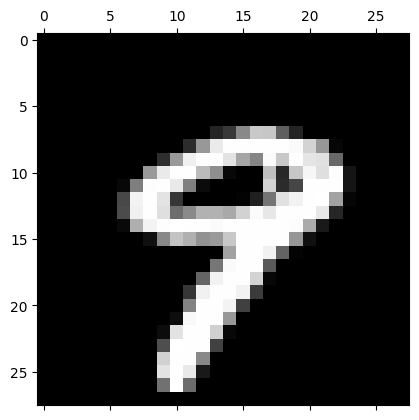

In [9]:
n=9
plt.matshow(test_images1[n],cmap='grey')
print(predictions[n])  # Probabilities for each class
print("Predicted labels:", np.argmax(predictions[n]))
print("True labels:", test_labels[n])


In [10]:
predictions[0:5]

array([[8.5261481e-06, 8.3535831e-11, 1.5549656e-05, 4.5825443e-03,
        6.2430570e-07, 2.9434537e-05, 3.5117612e-10, 9.9471927e-01,
        2.0591562e-05, 6.2342937e-04],
       [5.7559781e-04, 3.0001916e-06, 9.9151671e-01, 1.9526177e-04,
        2.5721986e-13, 2.9217375e-03, 4.7176401e-03, 7.0403542e-16,
        7.0118345e-05, 1.4964270e-12],
       [2.7321453e-06, 9.7829711e-01, 1.2638041e-02, 2.7509108e-03,
        1.5560794e-04, 8.4974722e-04, 1.1775102e-03, 8.8412961e-04,
        2.9505594e-03, 2.9375582e-04],
       [9.9984503e-01, 1.0019204e-11, 3.3659991e-05, 1.4125861e-06,
        1.2302312e-08, 5.2653966e-05, 3.8274626e-05, 9.8630535e-06,
        8.7839580e-06, 1.0263634e-05],
       [5.6380965e-04, 6.2972566e-07, 2.4391459e-03, 3.7361180e-05,
        9.5406759e-01, 1.5235200e-04, 2.3391626e-03, 3.1206834e-03,
        4.5040683e-03, 3.2775152e-02]], dtype=float32)

In [11]:
predicted_labels= [ np.argmax(i) for i in predictions]

In [12]:
cm=confusion_matrix(test_labels,predicted_labels)

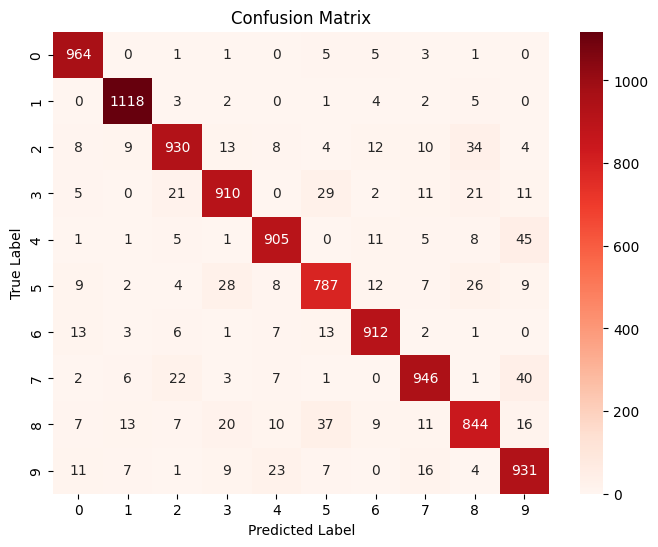

In [13]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Reds')
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            # xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [14]:
# Build the model
model2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,)),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
     # Output layer with 10 neurons for each class
])

In [15]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
)

In [16]:
model2.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8722 - loss: 0.4539
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9604 - loss: 0.1350
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9726 - loss: 0.0898
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9810 - loss: 0.0622
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9844 - loss: 0.0536
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9878 - loss: 0.0404
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9908 - loss: 0.0309
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9913 - loss: 0.0277
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9939 - loss: 0.0213
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9956 - loss: 0.0162


In [17]:
model2.evaluate(train_images, train_labels)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9956 - loss: 0.0155


[0.014512958005070686, 0.9958166480064392]

In [18]:
pred2 = model2.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [19]:
pred2=[np.argmax(i) for i in pred2]

In [20]:
cm2=confusion_matrix(test_labels,pred2)

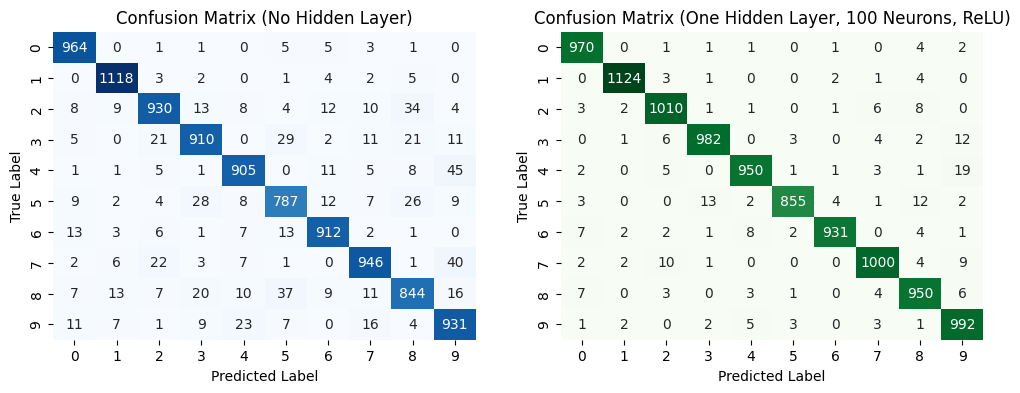

In [21]:
# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",cbar=False, ax=axes[0])
axes[0].set_title("Confusion Matrix (No Hidden Layer)")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

sns.heatmap(cm2, annot=True, fmt="d", cmap="Greens",cbar=False, ax=axes[1])
axes[1].set_title("Confusion Matrix (One Hidden Layer, 100 Neurons, ReLU)")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

plt.show()

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


c:\Program Files\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)